# Question 1 Analysis 1

This Analysis will go through all the emails deleted by the Kenneth Lay, who was one of the main convicts of Enron Scandal and alos the CEO and chairman of Enron Corporation. It is said that a lot of people had emailed him regarding company's poor financial state but still he supposedly ignored them 

In [ ]:
import os
import email  #used to parse through the emails
import operator
import json
import glob
from email.parser import Parser
from collections import Counter

In [30]:
# This will set the root path, which will be used for data fetching
from os.path import expanduser
home = expanduser("~")
root = home+"\\midterm\\data\\enron\\maildir\\lay-k\\deleted_items"
print("Root :",root)
path = "C:\\Users\\ninad\\midterm\\data\\enron\\maildir\\lay-k\\deleted_items"

Root : C:\Users\ninad\midterm\data\enron\maildir\lay-k\deleted_items


In [31]:
#Email parsing
to_email_list =[] #list to collect "To" section of email
from_email_list=[] #list to collect "From" section of email
email_body=[]  #list to collect the body of the email
for filename in glob.glob("C:\\Users\\ninad\\midterm\\data\\enron\\maildir\\lay-k\\deleted_items\\*"):
    #print(filename)
    with open(filename,'r') as f:
        data = f.read()
    email = Parser().parsestr(data)
    if email['to']:
        email_to = email['to']
        email_to = email_to.replace("\n", "")
        email_to = email_to.replace("\t", "")
        email_to = email_to.replace(" ", "")
        email_to = email_to.split(",")
    for email_to_split in email_to:
        to_email_list.append(email_to_split)
    from_email_list.append(email['from']) 
    email_body.append(email.get_payload())

In [32]:
print(Counter(from_email_list).most_common(10)) #This will display the email address of those people who had emailed him

[('aprilhoover@msn.com', 3), ('doctorbonner@altavista.com', 2), ('skinnerj@central.edu', 2), ('erun@webaccess.net', 2), ('randymonk@hotmail.com', 2), ('lyow@indiana.edu', 2), ('gladdy@earthlink.net', 2), ('kristenbradley@earthlink.net', 1), ('bobs@independentsector.org', 1), ('mharty@lib.siu.edu', 1)]


In [33]:
print(Counter(to_email_list).most_common(10)) #This list gives us only one name as all the emails were sent to Kenneth Lay

[('klay@enron.com', 1125), ('lighthouse@independent.org', 1)]


In [34]:
# This loop will get the data inside all the emails
with open("email_body.txt", "w") as f:
    for email_bod in email_body:
        if email_bod:
            f.write(email_bod)
            f.write("\n")

In [35]:
#Importing nltk we will analyze the data given inside all those emails
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [36]:
with open("email_body.txt",'r') as f:
    data_word=f.read()
    

In [39]:
words = word_tokenize(data_word)
useful_words = [word.lower()  for word in words if word not in stopwords.words('English')]


[(',', 12482), ('.', 8083), ('enron', 7816), ('employees', 4490), ('company', 4393), ("'s", 4371), ('made', 3359), ('california', 3348), ('energy', 3348), ('consumers', 3343), ('stock', 2249), ('$', 2246), ('million', 2245), ('millions', 2244), ('funds', 2243), ('bankruptcy', 2243), ('retirement', 2242), ('declared', 2241), ('donate', 2241), ('pay', 2232), ('bills', 2230), ('ca', 1314), ('new', 1181), ('york', 1164), ('the', 1155), ('i', 1153), ('mr.', 1128), ('money', 1128), ('dollars', 1127), ('lay', 1127), ('lost', 1125), ('state', 1125), ('to', 1125), ('fund', 1125), ('help', 1125), ('worth', 1125), ('100', 1124), ('americans', 1124), ('times', 1124), ('many', 1124), ('lives', 1123), ('@', 1123), ('101', 1123), ('transition', 1123), ('employee', 1123), ('selling', 1123), ('savings', 1122), ('devastated', 1122), ('repair', 1122), ('hurt', 1122), ('aggressively', 1122), ('please', 1122), ('urging', 1122), ('financially', 1122), ('sold', 1121), ('buying', 1121), ('ken', 1121), ('and',

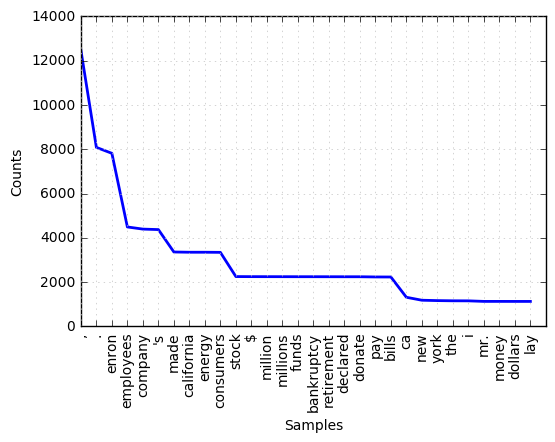

In [48]:
frequency = nltk.FreqDist(useful_words)
print(frequency.most_common(100))
frequency.plot(30,cumulative=False)

C:\Users\ninad\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 'U' mode is deprecated
  app.launch_new_instance()


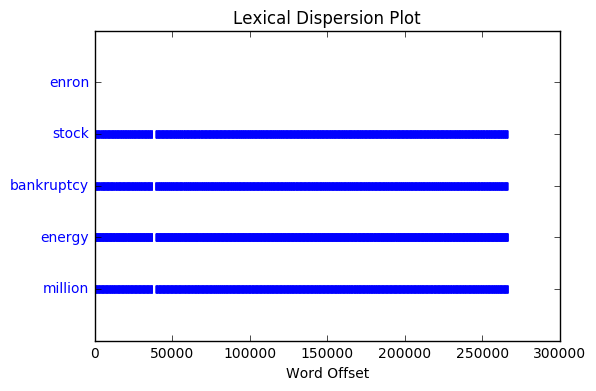

In [47]:
import matplotlib.pyplot as plt #for graphical representation
f=open('C:\\Users\\ninad\\midterm\\email_body.txt','rU')    # open the file
raw = f.read()                     # read the text
tokens = nltk.word_tokenize(raw)   # tokenize it
mytext = nltk.Text(tokens)
mytext.dispersion_plot(["enron", "stock", "bankruptcy", "energy", "million"])

# Conclusion:
Enron employees were emailing Mr.Lay regarding they not getting their monthly wages and also about bankruptcy. As Enron was bankrupt it was not able to pay any bills which their clients were demanding from him to be paid. People owning Enron stocks were complaining about decreasing stock prices
As from the plot we can observe that enron, employees, energy, consumers, stocks, funds, bankruptcy, bills etc are the words that were mostly used in those emails.
Thousands of current and former Enron employees have lost their jobs, health care and life savings since the bankruptcy of the gas and trading giant last month, while records show that many of Enron’s top executives made in the tens and some in the hundreds of millions of dollars during the past year, while concealing the true financial state of the company. Thousands of current, laid-off and retired workers lost most of their life savings when the company prevented workers from selling Enron stock held in 401(k) saving accounts just as the stock price plummeted.

From this we can conclude that Kenneth Lay had knowledge about all these circumstances but was not concerned as all these emails were found in deleted items